In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
low_memory = False


In [21]:
listings = pd.read_csv("data/listings.csv.gz")
calendar = pd.read_csv("data/calendar.csv.gz")
reviews = pd.read_csv("data/reviews.csv.gz")


C:\Users\User\AppData\Local\Temp\ipykernel_10200\113647517.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  calendar = pd.read_csv("data/calendar.csv.gz")


In [22]:
print(listings.info())
print(calendar.info())
print(reviews.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23564 entries, 0 to 23563
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            23564 non-null  int64  
 1   listing_url                                   23564 non-null  object 
 2   scrape_id                                     23564 non-null  int64  
 3   last_scraped                                  23564 non-null  object 
 4   source                                        23564 non-null  object 
 5   name                                          23563 non-null  object 
 6   description                                   23161 non-null  object 
 7   neighborhood_overview                         13906 non-null  object 
 8   picture_url                                   23564 non-null  object 
 9   host_id                                       23564 non-null 

In [23]:
print(listings.isnull().any())

id                                              False
listing_url                                     False
scrape_id                                       False
last_scraped                                    False
source                                          False
                                                ...  
calculated_host_listings_count                  False
calculated_host_listings_count_entire_homes     False
calculated_host_listings_count_private_rooms    False
calculated_host_listings_count_shared_rooms     False
reviews_per_month                                True
Length: 75, dtype: bool


In [24]:
unique_neighbourhoods = listings["neighbourhood"].unique()

unique_neighbourhoods

array(['Southern Suburbs, Western Cape, South Africa',
       'Cape Town, Western Cape, South Africa', nan,
       'Tableview - Sunset Beach, Cape Town, South Africa',
       'Durbanville, Western Cape, South Africa',
       'Cape Town, Western Province, South Africa',
       'Fish Hoek, Western Cape, South Africa',
       'Blouberg, Western Cape, South Africa',
       'South Africa , Western Cape, South Africa',
       'Cape Town, South Africa',
       'Green Point, Western Cape, South Africa',
       'Noordhoek, Cape Town, Western Cape, South Africa',
       'Cape Town, WC, South Africa', 'Bakoven, South Africa',
       "Simon's Town, Western Cape, South Africa",
       'Kalk Bay, Cape Town, Western Cape, South Africa',
       'Khayelitsha , WC, South Africa', 'Scarborough , Wc, South Africa',
       'Marina Da Gama, Western Cape, South Africa',
       'Cape Town, We, South Africa',
       'Somerset West, Western Cape, South Africa',
       'Strand, Western Cape, South Africa',
     

In [25]:
missing_values = listings["neighbourhood"].isnull().sum()
missing_values

9658

In [26]:
def fill_missing_neighbourhood(row):
  """
  Fills missing neighbourhood values based on the description.
  """
  if pd.isnull(row['neighbourhood']):
    for neighbourhood in unique_neighbourhoods:
      if not pd.isnull(neighbourhood) and neighbourhood.lower() in str(row['description']).lower():
        return neighbourhood
  return row['neighbourhood']


# Apply the function to the listings DataFrame
listings['neighbourhood'] = listings.apply(fill_missing_neighbourhood, axis=1)

# Check the percentage of missing values after filling
missing_percentage_after = (listings['neighbourhood'].isnull().sum() / len(listings)) * 100
print(f"Percentage of missing values after filling: {missing_percentage_after:.2f}%")

Percentage of missing values after filling: 40.41%


In [27]:
cape_town_neighbourhoods = [
    "Gardens",
    "Tamboerskloof",
    "Bo-Kaap",
    "De Waterkant",
    "Woodstock",
    "Sea Point",
    "Green Point",
    "Camps Bay",
    "Clifton",
    "Constantia",
    "Newlands",
    "Rondebosch",
    "Claremont",
    "Observatory",
    "Bellville",
    "Durbanville",
    "Parow",
    "Muizenberg",
    "Kalk Bay",
    "Simon's Town",
    "Fish Hoek",
    "Noordhoek",
    "Zonnebloem",
    "Foreshore",
    "Hout Bay",
    "Llandudno",
    "Kenilworth",
    "Wynberg",
    "Bishopscourt",
    "Plattekloof",
    "Brackenfell",
    "Goodwood",
    "Stellenbosch",
    "Somerset West",
    "Franschhoek",
    "Mitchells Plain",
    "Khayelitsha",
    "Philippi"
]

def fill_missing_neighbourhood_cape_town(row):
  """
  Fills missing neighbourhood values based on the description, using a list of Cape Town neighbourhoods.
  """
  if pd.isnull(row['neighbourhood']):
    for neighbourhood in cape_town_neighbourhoods:
      if neighbourhood.lower() in str(row['description']).lower():
        return neighbourhood
  return row['neighbourhood']

# Apply the function to the listings DataFrame
listings['neighbourhood'] = listings.apply(fill_missing_neighbourhood_cape_town, axis=1)

# Check the percentage of missing values after filling
missing_percentage_after = (listings['neighbourhood'].isnull().sum() / len(listings)) * 100
print(f"Percentage of missing values after filling (Cape Town): {missing_percentage_after:.2f}%")

Percentage of missing values after filling (Cape Town): 27.75%


In [28]:
airbnb_df = pd.merge(reviews , listings, left_on = "listing_id", right_on = "id", how = "inner")

airbnb_df.head()

,listing_id,id_x,date,reviewer_id,reviewer_name,comments,id_y,listing_url,scrape_id,last_scraped,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3191,4888238,2013-05-31,5737473,Kathleen,Great home away from home! Bridgette and Marth...,3191,https://www.airbnb.com/rooms/3191,20240629050116,2024-06-29,...,4.96,4.77,4.81,NaN,t,1,1,0,0,0.59
1,3191,9128602,2013-12-09,8170322,Anita,Das Cottage liegt ruhig und sicher. Wir haben...,3191,https://www.airbnb.com/rooms/3191,20240629050116,2024-06-29,...,4.96,4.77,4.81,NaN,t,1,1,0,0,0.59
2,3191,9924130,2014-01-20,4039279,Zacki,This cottage was a great base from which to ex...,3191,https://www.airbnb.com/rooms/3191,20240629050116,2024-06-29,...,4.96,4.77,4.81,NaN,t,1,1,0,0,0.59
3,3191,16659537,2014-07-31,9729939,Doug,I had a great stay. All my needs were well ex...,3191,https://www.airbnb.com/rooms/3191,20240629050116,2024-06-29,...,4.96,4.77,4.81,NaN,t,1,1,0,0,0.59
4,3191,23247470,2014-11-26,9681619,Christopher,Excellent host. She provided everything we cou...,3191,https://www.airbnb.com/rooms/3191,20240629050116,2024-06-29,...,4.96,4.77,4.81,NaN,t,1,1,0,0,0.59


In [29]:
airbnb_df.shape

(560438, 81)

In [30]:
airbnb_df.head(50)

,listing_id,id_x,date,reviewer_id,reviewer_name,comments,id_y,listing_url,scrape_id,last_scraped,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3191,4888238,2013-05-31,5737473,Kathleen,Great home away from home! Bridgette and Marth...,3191,https://www.airbnb.com/rooms/3191,20240629050116,2024-06-29,...,4.96,4.77,4.81,NaN,t,1,1,0,0,0.59
1,3191,9128602,2013-12-09,8170322,Anita,Das Cottage liegt ruhig und sicher. Wir haben...,3191,https://www.airbnb.com/rooms/3191,20240629050116,2024-06-29,...,4.96,4.77,4.81,NaN,t,1,1,0,0,0.59
2,3191,9924130,2014-01-20,4039279,Zacki,This cottage was a great base from which to ex...,3191,https://www.airbnb.com/rooms/3191,20240629050116,2024-06-29,...,4.96,4.77,4.81,NaN,t,1,1,0,0,0.59
3,3191,16659537,2014-07-31,9729939,Doug,I had a great stay. All my needs were well ex...,3191,https://www.airbnb.com/rooms/3191,20240629050116,2024-06-29,...,4.96,4.77,4.81,NaN,t,1,1,0,0,0.59
4,3191,23247470,2014-11-26,9681619,Christopher,Excellent host. She provided everything we cou...,3191,https://www.airbnb.com/rooms/3191,20240629050116,2024-06-29,...,4.96,4.77,4.81,NaN,t,1,1,0,0,0.59
5,3191,30757722,2015-04-27,19846063,C.J.M.,We kregen een verwarmend welkom in het huisje ...,3191,https://www.airbnb.com/rooms/3191,20240629050116,2024-06-29,...,4.96,4.77,4.81,NaN,t,1,1,0,0,0.59
6,3191,34203620,2015-06-06,30266918,Thomas,This was the perfect guest home for me to stay...,3191,https://www.airbnb.com/rooms/3191,20240629050116,2024-06-29,...,4.96,4.77,4.81,NaN,t,1,1,0,0,0.59
7,3191,58513756,2016-01-03,3749815,Peter,Fantastic cottage! Fantastic host. Safe neighb...,3191,https://www.airbnb.com/rooms/3191,20240629050116,2024-06-29,...,4.96,4.77,4.81,NaN,t,1,1,0,0,0.59
8,3191,60163862,2016-01-19,43688831,John,Lovely little cottage with a very attentive an...,3191,https://www.airbnb.com/rooms/3191,20240629050116,2024-06-29,...,4.96,4.77,4.81,NaN,t,1,1,0,0,0.59
9,3191,70663293,2016-04-19,7604652,Alon,I loved staying at Briggite's place. The neig...,3191,https://www.airbnb.com/rooms/3191,20240629050116,2024-06-29,...,4.96,4.77,4.81,NaN,t,1,1,0,0,0.59


In [31]:
airbnb_duplicates = airbnb_df[airbnb_df.duplicated()]

clean_airbnb_df = airbnb_df.drop_duplicates()

clean_airbnb_df


,listing_id,id_x,date,reviewer_id,reviewer_name,comments,id_y,listing_url,scrape_id,last_scraped,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3191,4888238,2013-05-31,5737473,Kathleen,Great home away from home! Bridgette and Marth...,3191,https://www.airbnb.com/rooms/3191,20240629050116,2024-06-29,...,4.96,4.77,4.81,NaN,t,1,1,0,0,0.59
1,3191,9128602,2013-12-09,8170322,Anita,Das Cottage liegt ruhig und sicher. Wir haben...,3191,https://www.airbnb.com/rooms/3191,20240629050116,2024-06-29,...,4.96,4.77,4.81,NaN,t,1,1,0,0,0.59
2,3191,9924130,2014-01-20,4039279,Zacki,This cottage was a great base from which to ex...,3191,https://www.airbnb.com/rooms/3191,20240629050116,2024-06-29,...,4.96,4.77,4.81,NaN,t,1,1,0,0,0.59
3,3191,16659537,2014-07-31,9729939,Doug,I had a great stay. All my needs were well ex...,3191,https://www.airbnb.com/rooms/3191,20240629050116,2024-06-29,...,4.96,4.77,4.81,NaN,t,1,1,0,0,0.59
4,3191,23247470,2014-11-26,9681619,Christopher,Excellent host. She provided everything we cou...,3191,https://www.airbnb.com/rooms/3191,20240629050116,2024-06-29,...,4.96,4.77,4.81,NaN,t,1,1,0,0,0.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560433,1176776459864168795,1179648539055748397,2024-06-15,22219490,Alma,We had a magnificent stay at Joshua’s place in...,1176776459864168795,https://www.airbnb.com/rooms/1176776459864168795,20240629050116,2024-06-29,...,5.00,5.00,5.00,NaN,f,1,1,0,0,2.00
560434,1176776459864168795,1182546772295899939,2024-06-19,175402238,Kyle,My stay was exceptional! The apartment was imm...,1176776459864168795,https://www.airbnb.com/rooms/1176776459864168795,20240629050116,2024-06-29,...,5.00,5.00,5.00,NaN,f,1,1,0,0,2.00
560435,1177000114442548438,1186115734947825687,2024-06-24,348893575,Marcus,"Fantastic stay, beautiful apartment with amazi...",1177000114442548438,https://www.airbnb.com/rooms/1177000114442548438,20240629050116,2024-06-30,...,5.00,5.00,5.00,NaN,f,69,68,1,0,1.00
560436,1177475834453160866,1186071364511823679,2024-06-24,90974045,Theo,Very friendly family in a nice quiet neighbour...,1177475834453160866,https://www.airbnb.com/rooms/1177475834453160866,20240629050116,2024-06-29,...,5.00,5.00,5.00,NaN,f,1,1,0,0,2.00


In [32]:
airbnb_df.columns

Index(['listing_id', 'id_x', 'date', 'reviewer_id', 'reviewer_name',
       'comments', 'id_y', 'listing_url', 'scrape_id', 'last_scraped',
       'source', 'name', 'description', 'neighborhood_overview', 'picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maxi

In [33]:
drop_columns = ['listing_id', 'reviewer_id', 'reviewer_name', 'id_y', 'listing_url', 'scrape_id', 'last_scraped',
       'source', 'picture_url','host_id', 'host_url', 'host_name', 'host_since', 'host_location','host_about', 'host_response_time', 
       'host_response_rate','host_acceptance_rate', 'host_thumbnail_url','host_picture_url', 'host_listings_count',
       'host_total_listings_count', 'host_verifications','host_has_profile_pic', 'host_identity_verified', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights','maximum_maximum_nights', 'minimum_nights_avg_ntm','maximum_nights_avg_ntm',
       'availability_30', 'availability_60', 'availability_90','availability_365', 'calendar_last_scraped','number_of_reviews_ltm', 
       'number_of_reviews_l30d', 'calculated_host_listings_count','calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms']

clean_df = airbnb_df.drop(columns = drop_columns)

In [34]:
clean_df.head()

,id_x,date,comments,name,description,neighborhood_overview,host_is_superhost,host_neighbourhood,neighbourhood,neighbourhood_cleansed,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,reviews_per_month
0,4888238,2013-05-31,Great home away from home! Bridgette and Marth...,Malleson Garden Cottage,"This is a lovely, separate, self-catering cott...","Mowbray is on the Southern Suburbs line, 6km (...",f,NaN,"Southern Suburbs, Western Cape, South Africa",Ward 57,...,4.82,4.84,4.7,4.97,4.96,4.77,4.81,NaN,t,0.59
1,9128602,2013-12-09,Das Cottage liegt ruhig und sicher. Wir haben...,Malleson Garden Cottage,"This is a lovely, separate, self-catering cott...","Mowbray is on the Southern Suburbs line, 6km (...",f,NaN,"Southern Suburbs, Western Cape, South Africa",Ward 57,...,4.82,4.84,4.7,4.97,4.96,4.77,4.81,NaN,t,0.59
2,9924130,2014-01-20,This cottage was a great base from which to ex...,Malleson Garden Cottage,"This is a lovely, separate, self-catering cott...","Mowbray is on the Southern Suburbs line, 6km (...",f,NaN,"Southern Suburbs, Western Cape, South Africa",Ward 57,...,4.82,4.84,4.7,4.97,4.96,4.77,4.81,NaN,t,0.59
3,16659537,2014-07-31,I had a great stay. All my needs were well ex...,Malleson Garden Cottage,"This is a lovely, separate, self-catering cott...","Mowbray is on the Southern Suburbs line, 6km (...",f,NaN,"Southern Suburbs, Western Cape, South Africa",Ward 57,...,4.82,4.84,4.7,4.97,4.96,4.77,4.81,NaN,t,0.59
4,23247470,2014-11-26,Excellent host. She provided everything we cou...,Malleson Garden Cottage,"This is a lovely, separate, self-catering cott...","Mowbray is on the Southern Suburbs line, 6km (...",f,NaN,"Southern Suburbs, Western Cape, South Africa",Ward 57,...,4.82,4.84,4.7,4.97,4.96,4.77,4.81,NaN,t,0.59


In [35]:
clean_df["average_rating"] = clean_df[["review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness",
                                       "review_scores_checkin", "review_scores_communication",
                                       "review_scores_location", "review_scores_value"]].mean(axis=1)

review_columns = ["review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness",
                                       "review_scores_checkin", "review_scores_communication",
                                       "review_scores_location", "review_scores_value"]

clean_df = clean_df.drop(columns = review_columns)

clean_df.head()

,id_x,date,comments,name,description,neighborhood_overview,host_is_superhost,host_neighbourhood,neighbourhood,neighbourhood_cleansed,...,maximum_nights,calendar_updated,has_availability,number_of_reviews,first_review,last_review,license,instant_bookable,reviews_per_month,average_rating
0,4888238,2013-05-31,Great home away from home! Bridgette and Marth...,Malleson Garden Cottage,"This is a lovely, separate, self-catering cott...","Mowbray is on the Southern Suburbs line, 6km (...",f,NaN,"Southern Suburbs, Western Cape, South Africa",Ward 57,...,730,NaN,t,79,2013-05-31,2024-06-18,NaN,t,0.59,4.838571
1,9128602,2013-12-09,Das Cottage liegt ruhig und sicher. Wir haben...,Malleson Garden Cottage,"This is a lovely, separate, self-catering cott...","Mowbray is on the Southern Suburbs line, 6km (...",f,NaN,"Southern Suburbs, Western Cape, South Africa",Ward 57,...,730,NaN,t,79,2013-05-31,2024-06-18,NaN,t,0.59,4.838571
2,9924130,2014-01-20,This cottage was a great base from which to ex...,Malleson Garden Cottage,"This is a lovely, separate, self-catering cott...","Mowbray is on the Southern Suburbs line, 6km (...",f,NaN,"Southern Suburbs, Western Cape, South Africa",Ward 57,...,730,NaN,t,79,2013-05-31,2024-06-18,NaN,t,0.59,4.838571
3,16659537,2014-07-31,I had a great stay. All my needs were well ex...,Malleson Garden Cottage,"This is a lovely, separate, self-catering cott...","Mowbray is on the Southern Suburbs line, 6km (...",f,NaN,"Southern Suburbs, Western Cape, South Africa",Ward 57,...,730,NaN,t,79,2013-05-31,2024-06-18,NaN,t,0.59,4.838571
4,23247470,2014-11-26,Excellent host. She provided everything we cou...,Malleson Garden Cottage,"This is a lovely, separate, self-catering cott...","Mowbray is on the Southern Suburbs line, 6km (...",f,NaN,"Southern Suburbs, Western Cape, South Africa",Ward 57,...,730,NaN,t,79,2013-05-31,2024-06-18,NaN,t,0.59,4.838571


In [36]:
clean_df.duplicated().sum

<bound method Series.sum of 0         False
1         False
2         False
3         False
4         False
          ...  
560433    False
560434    False
560435    False
560436    False
560437    False
Length: 560438, dtype: bool>

In [37]:
# group listings by neighborhood and count the number of listings in each neighborhood
neighborhood_listing_counts = listings.groupby('neighbourhood')['id'].count().sort_values(ascending=False)

# top 20 neighborhoods with the most listings
top_20_neighborhoods = neighborhood_listing_counts.head(20)

print("Top 20 Neighborhoods with the Most Listings:")
top_20_neighborhoods

Top 20 Neighborhoods with the Most Listings:


neighbourhood
Cape Town, Western Cape, South Africa    12843
Sea Point                                  437
Cape Town, WC, South Africa                410
Camps Bay                                  336
Gardens                                    318
Constantia                                 217
Durbanville                                155
Green Point                                142
Muizenberg                                 138
De Waterkant                               133
South Africa                               128
Hout Bay                                   122
Stellenbosch                               113
Kalk Bay                                    97
Somerset West                               79
Cape Town, South Africa                     72
Noordhoek                                   69
Rondebosch                                  66
Woodstock                                   62
Newlands                                    58
Name: id, dtype: int64

In [40]:
# Remove non-numeric characters (e.g., $ sign, commas) and convert to numeric
listings['price'] = listings['price'].replace('[\$,]', '', regex=True).astype(float)

# Group by neighbuorhood and calculate the mean price
neighborhood_prices = listings.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)

# top 10 neighborhoods with the highest average price
top_20_neighbourhoods = neighborhood_prices.head(20)

print("Top 20 Neighborhoods with the Highest Average Price:")
top_20_neighborhoods

Top 20 Neighborhoods with the Highest Average Price:


neighbourhood
Cape Town, Western Cape, South Africa    12843
Sea Point                                  437
Cape Town, WC, South Africa                410
Camps Bay                                  336
Gardens                                    318
Constantia                                 217
Durbanville                                155
Green Point                                142
Muizenberg                                 138
De Waterkant                               133
South Africa                               128
Hout Bay                                   122
Stellenbosch                               113
Kalk Bay                                    97
Somerset West                               79
Cape Town, South Africa                     72
Noordhoek                                   69
Rondebosch                                  66
Woodstock                                   62
Newlands                                    58
Name: id, dtype: int64

In [ ]:

# 1. Convert price to numeric format
listings['price'] = listings['price'].replace('[\$,]', '', regex=True).astype(float)

# 2. Remove rows with missing values 
filtered_listings = listings[['price', 'review_scores_rating']].dropna()

# 3. Group by price and calculate the average rating for each price point
price_rating_avg = filtered_listings.groupby('price').review_scores_rating.mean().reset_index()

# 4. Filter out extreme price outliers
price_upper_limit = price_rating_avg['price'].quantile(0.95)
price_rating_avg = price_rating_avg[price_rating_avg['price'] <= price_upper_limit]

# 5. Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=price_rating_avg, x='price', y='review_scores_rating')
plt.title('Average Rating vs. Price')
plt.xlabel('Price (in USD)')
plt.ylabel('Average Rating')
plt.show()


In [ ]:
# From the plot, there doesn’t appear to be a strong correlation between price and rating. High-priced listings don’t necessarily have higher ratings, and lower-priced listings can still achieve top ratings.

# Most listings have prices below $2,000, with few listings at higher price points. Prices above $10,000 are rare, with a few extreme outliers around the $12,000–$14,000 range.

# There is a high number of listings that appear to have ratings between 4.0 and 5.0, regardless of price. A high concentration of data points in this range indicates that Airbnb listings generally receive high ratings, even for low to moderately priced accommodations.

C:\Users\User\AppData\Local\Temp\ipykernel_10200\3104678792.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.bar(top_20_neighborhoods.index, top_20_neighborhoods.values, color=plt.cm.get_cmap('viridis')(np.linspace(0, 1, len(top_20_neighborhoods))))


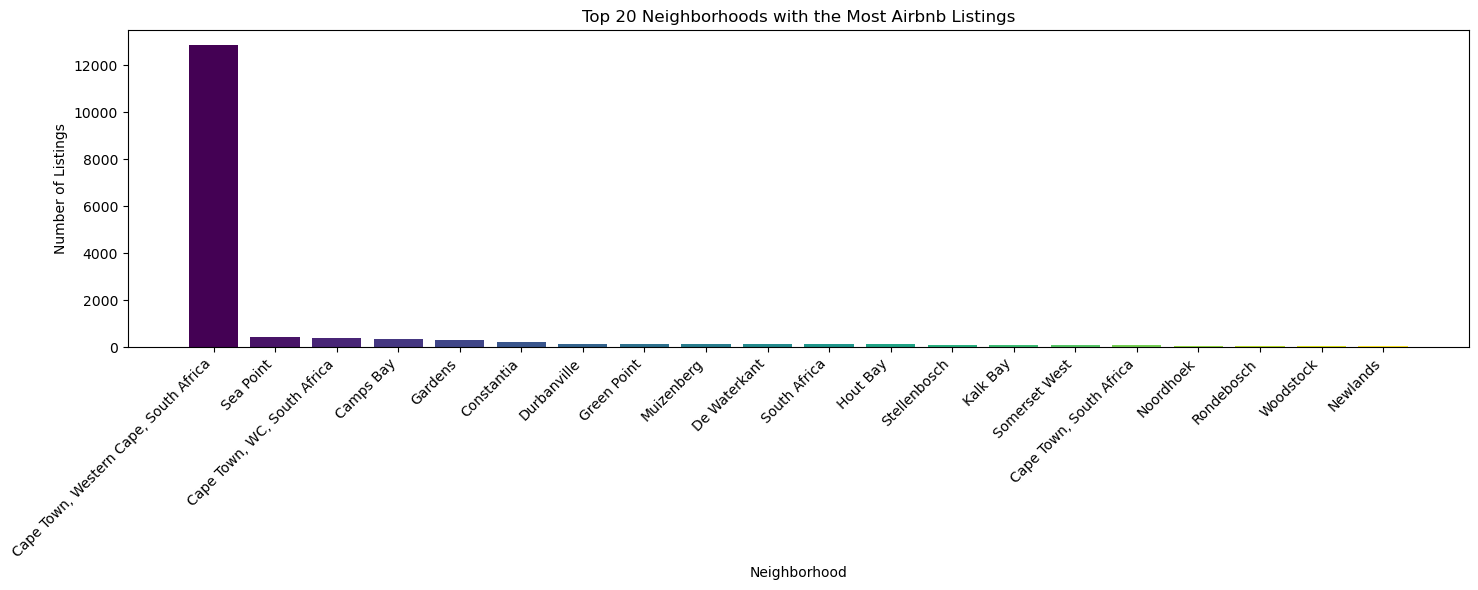

In [41]:
# Create a bar plot
plt.figure(figsize=(15, 6))  
plt.bar(top_20_neighborhoods.index, top_20_neighborhoods.values, color=plt.cm.get_cmap('viridis')(np.linspace(0, 1, len(top_20_neighborhoods))))
plt.xlabel('Neighborhood')
plt.ylabel('Number of Listings')
plt.title('Top 20 Neighborhoods with the Most Airbnb Listings')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_10200\3094284072.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.bar(top_20_neighborhoods.index, top_20_neighborhoods.values, color=plt.cm.get_cmap('viridis')(np.linspace(0, 1, len(top_20_neighborhoods))))


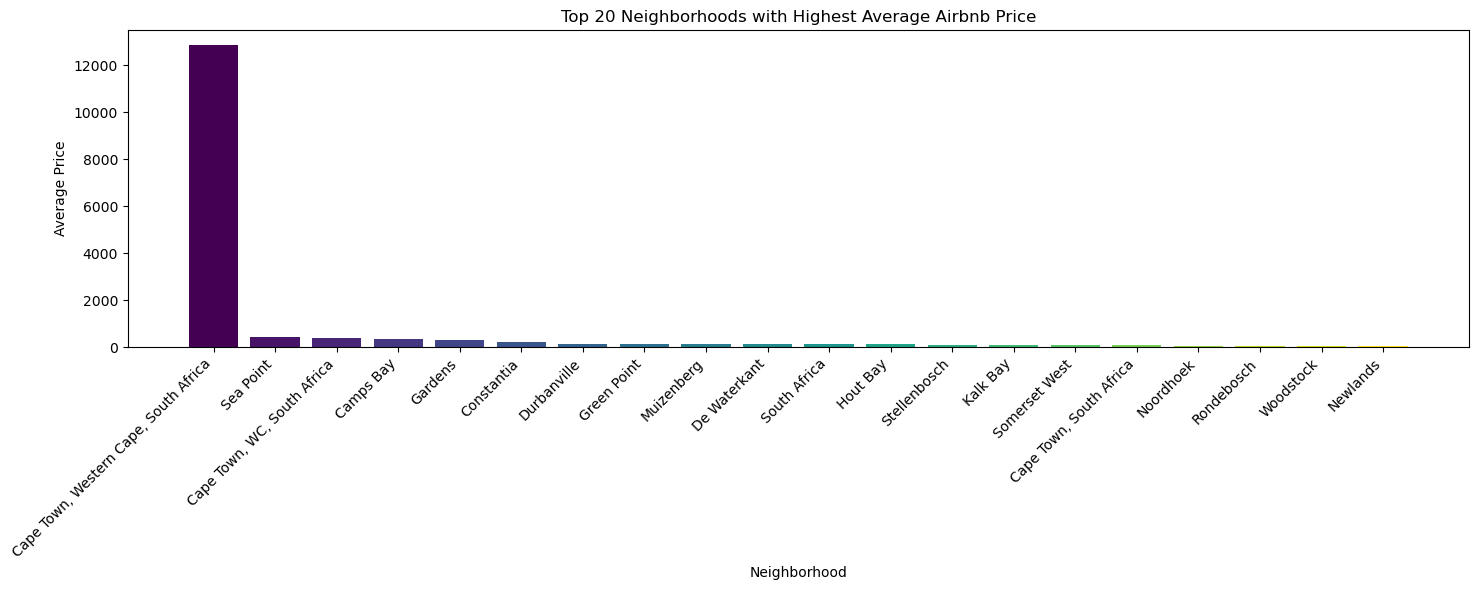

In [43]:
# Create a bar plot
plt.figure(figsize=(15, 6))  
plt.bar(top_20_neighborhoods.index, top_20_neighborhoods.values, color=plt.cm.get_cmap('viridis')(np.linspace(0, 1, len(top_20_neighborhoods))))
plt.xlabel('Neighborhood')
plt.ylabel('Average Price')
plt.title('Top 20 Neighborhoods with Highest Average Airbnb Price')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()